In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.base import clone
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
M = 100

np.random.seed(42)

x = 6*np.random.rand(M, 1) - 3
y = 2 + x + 0.5*x**2 
y_noisy = y + np.random.randn(M, 1)

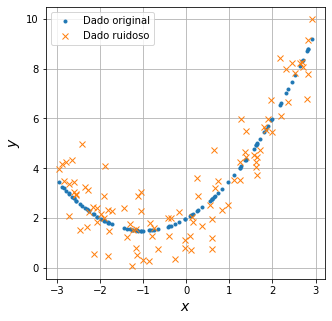

In [4]:
# Plot original data versus noisy version.
fig = plt.figure(figsize=(5,5))
plt.plot(x, y, '.', label='Dado original')
plt.plot(x, y_noisy, 'x', label='Dado ruidoso')
#plt.plot(x_test, y_test, 'o', label='Dado teste')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend()
plt.grid()
#Show the plot.
plt.show()

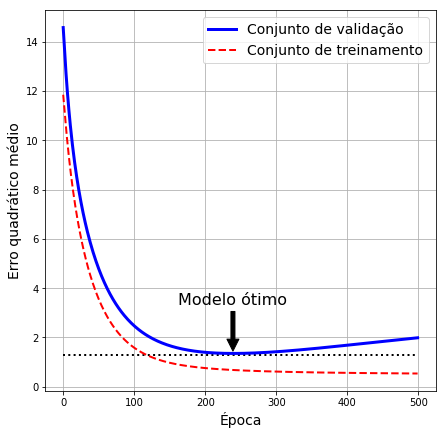

In [11]:
X_train, X_val, y_train, y_val = train_test_split(x[:50], y_noisy[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler()),
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,
                       tol=-np.infty,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
    if val_errors[epoch] < minimum_val_error:
        minimum_val_error = val_errors[epoch]
        best_epoch = epoch
        best_model = clone(sgd_reg)

best_epoch = np.argmin(val_errors)
best_val_rmse = val_errors[best_epoch]

fig = plt.figure(figsize=(7,7))
plt.annotate('Modelo ótimo',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 2),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.05  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(val_errors, "b-", linewidth=3, label="Conjunto de validação")
plt.plot(train_errors, "r--", linewidth=2, label="Conjunto de treinamento")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Época", fontsize=14)
plt.ylabel("Erro quadrático médio", fontsize=14)
plt.grid()
# Save figure
plt.savefig("early_stopping.png", dpi=600)
plt.show()